
Outputs for activation: sigmoid
Input[0]: -5.00 --> Output: 0.0802
Input[0]: -4.80 --> Output: 0.0864
Input[0]: -4.59 --> Output: 0.0931
Input[0]: -4.39 --> Output: 0.1002
Input[0]: -4.18 --> Output: 0.1078
Input[0]: -3.98 --> Output: 0.1159
Input[0]: -3.78 --> Output: 0.1245
Input[0]: -3.57 --> Output: 0.1337
Input[0]: -3.37 --> Output: 0.1434
Input[0]: -3.16 --> Output: 0.1538
Input[0]: -2.96 --> Output: 0.1647
Input[0]: -2.76 --> Output: 0.1762
Input[0]: -2.55 --> Output: 0.1884
Input[0]: -2.35 --> Output: 0.2012
Input[0]: -2.14 --> Output: 0.2146
Input[0]: -1.94 --> Output: 0.2287
Input[0]: -1.73 --> Output: 0.2434
Input[0]: -1.53 --> Output: 0.2588
Input[0]: -1.33 --> Output: 0.2748
Input[0]: -1.12 --> Output: 0.2913
Input[0]: -0.92 --> Output: 0.3085
Input[0]: -0.71 --> Output: 0.3261
Input[0]: -0.51 --> Output: 0.3443
Input[0]: -0.31 --> Output: 0.3630
Input[0]: -0.10 --> Output: 0.3821
Input[0]: 0.10 --> Output: 0.4015
Input[0]: 0.31 --> Output: 0.4213
Input[0]: 0.51 --> Outpu

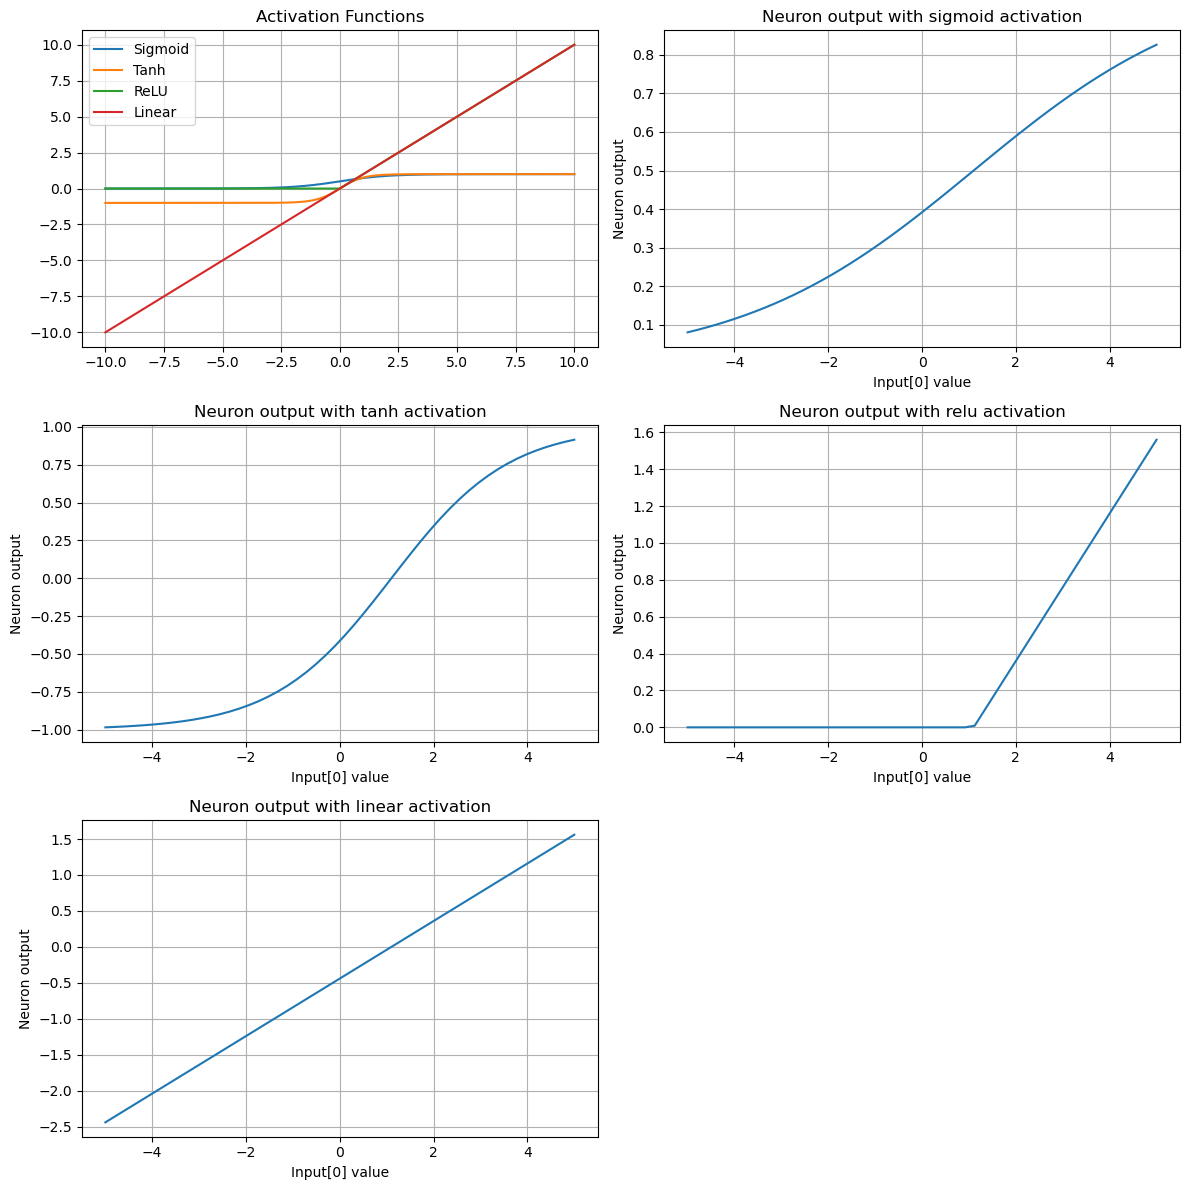

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


class Neuron:
    def __init__(self, bias, weights, activation='sigmoid'):
        self.weights = np.array(weights)
        self.bias = bias

        if activation == 'relu':
            self.activation_fn = relu
        elif activation == 'sigmoid':
            self.activation_fn = sigmoid
        elif activation == 'tanh':
            self.activation_fn = tanh
        elif activation == 'linear':
            self.activation_fn = linear
        else:
            raise ValueError("Unsupported activation function")

        self.activation = activation 

    def forward(self, input):
        z = np.dot(input, self.weights) + self.bias
        return self.activation_fn(z)


input_range = np.linspace(-5, 5, 50)  
fixed_inputs = np.array([0.5, -1.2]) 

weights = [0.4, -0.6, 0.2]
bias = 0.1

activations = ['sigmoid', 'tanh', 'relu', 'linear']

plt.figure(figsize=(12, 12))


x_vals = np.linspace(-10, 10, 400)
plt.subplot(3, 2, 1)
plt.title("Activation Functions")
plt.plot(x_vals, sigmoid(x_vals), label='Sigmoid')
plt.plot(x_vals, tanh(x_vals), label='Tanh')
plt.plot(x_vals, relu(x_vals), label='ReLU')
plt.plot(x_vals, linear(x_vals), label='Linear')
plt.legend()
plt.grid(True)

for i, act in enumerate(activations, start=2):
    outputs = []
    for val in input_range:
        inputs = np.array([val, *fixed_inputs])
        neuron = Neuron(bias, weights, activation=act)
        outputs.append(neuron.forward(inputs))
    

    print(f"\nOutputs for activation: {act}")
    for inp, out in zip(input_range, outputs):
        print(f"Input[0]: {inp:.2f} --> Output: {out:.4f}")

    
    plt.subplot(3, 2, i)
    plt.title(f"Neuron output with {act} activation")
    plt.plot(input_range, outputs, label=f'Output vs Input[0]')
    plt.xlabel('Input[0] value')
    plt.ylabel('Neuron output')
    plt.grid(True)

plt.tight_layout()
plt.show()
